In [3]:
import tensorflow as tf

hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [10]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype = np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [11]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [16]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.show()

In [13]:
def test_display():
    display(0)
    display(1)
    display(8)
    print( len(data[0]))
   

In [14]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)
result = classifier.evaluate(test_data, test_labels)
print (result["accuracy"])

C:\Users\Niranjan\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:260: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.9137


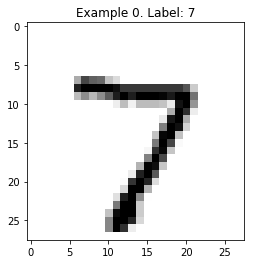

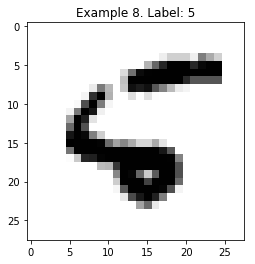

In [17]:
# here's one it gets right
# print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)
# and one it gets wrong
# print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)